<a href="https://colab.research.google.com/github/Ashwinia04/machine-learning/blob/main/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
species=[]
for i in range(len(iris['target'])):
    if iris['target'][i]==0:
        species.append('Setosa')
    elif iris['target'][i]==1:
        species.append('Versicolor')
    else:
        species.append('Virginica')

In [6]:
iris['species']=species

In [7]:
iris.groupby('species').size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

#statistical analysis

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Train and Tesr split

In [28]:
from sklearn.model_selection import train_test_split
X=iris.drop(['target','species'],axis=1)
y=iris['target']

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [12]:
X_train.shape

(120, 4)

In [13]:
Y_train.shape

(120,)

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [15]:
log_model.fit(X_train,Y_train)

LogisticRegression()

In [16]:
pred=log_model.predict(X_test)

In [17]:
training_prediction=log_model.predict(X_train)

In [18]:
testing_prediction=log_model.predict(X_test)

In [20]:
#performance analysis for training data
print(classification_report(Y_train,training_prediction))
#performance analysis for test data
print(classification_report(Y_test,testing_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       0.97      0.95      0.96        38
         2.0       0.95      0.98      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.92      0.96        12
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



SVM

In [32]:
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1].values


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [37]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

1.0

In [34]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data
classifier.fit(X_train, y_train)
#Make the prediction
y_pred = classifier.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
pred_tree=clf.predict(X_test)

In [23]:
print(classification_report(Y_test,pred_tree))
print(confusion_matrix(Y_test,pred_tree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.92      0.96        12
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


[Text(0.4, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.75, 'petal width (cm) <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.2, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'sepal length (cm) <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'petal length (cm) <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'petal length (cm) <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0

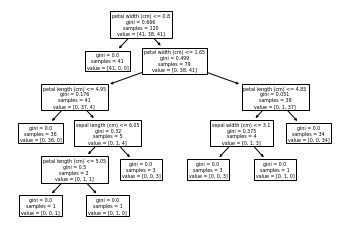

In [24]:
from sklearn import tree
tree.plot_tree(clf,feature_names=X_train.columns)